In [1]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import MinMaxScaler


In [2]:
import seaborn as sns
sns.set_style("whitegrid")

In [3]:
state = 'AL'

In [4]:
file_symptoms = 'comments/raw_comments/agent_comments_'+state+\
                        '_filtered_final_joined_selected_columns_use__min_01_df.fea'

In [5]:
noun_sentence_df_final_joined_df_selected_columns_use_min = pd.\
    read_feather(file_symptoms)

In [6]:
noun_sentence_df_final_joined_df_selected_columns_use_min

,index,listingid,AVM_Error_List,Listing_Error_List,Transdate,Transprice,total_value,cj_living_area,effective_year_built,story,...,Listing_Error_Indicators_7,Listing_Error_Indicators_8,Listing_Error_Indicators_9,Listing_Error_Indicators_10,Listing_Error_Indicators_11,clean_publicremarks_nltkpolarity_0,clean_publicremarks_nltkpolarity_1,clean_publicremarks_nltkpolarity_2,clean_publicremarks_nltkpolarity_3,transaction_year
0,8387,776,-0.553250,-0.120527,20171110,53100.0,73500.0,1014.0,1995.0,1.0,...,0.000000,0.015656,29492,20.449613,67.781093,0.7639,0.074,0.758,0.168,2017.0
1,383934,778,-0.510781,-0.043542,20171120,487762.0,460600.0,3593.0,1991.0,1.0,...,0.000000,0.019864,7049,22.215917,67.215208,0.9806,0.015,0.765,0.220,2017.0
2,1182772,781,-0.043611,-0.026712,20171219,146000.0,153900.0,1597.0,2005.0,1.0,...,0.000000,0.003364,69,18.840580,63.768116,0.9557,0.000,0.758,0.242,2017.0
3,810301,783,0.434195,-0.018210,20171222,324000.0,179300.0,1608.0,1991.0,1.0,...,0.000424,0.025517,1026,27.777778,59.259259,0.9063,0.041,0.768,0.191,2017.0
4,692995,932,0.129498,0.000236,20171229,84920.0,76900.0,1298.0,1989.0,1.0,...,0.000397,0.022533,1760,28.238636,59.034091,0.4199,0.000,0.642,0.358,2017.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206192,1079004,251475847,0.038527,0.000000,20210624,250000.0,201700.0,1830.0,2016.0,1.0,...,0.000311,0.007706,199,26.130653,24.120603,0.0000,0.000,1.000,0.000,2021.0
206193,810118,251507071,-0.158107,0.000000,20210311,815000.0,820400.0,3422.0,2017.0,1.0,...,0.000424,0.025517,1026,27.777778,59.259259,0.9134,0.000,0.840,0.160,2021.0
206194,977873,251592370,0.065219,0.000000,20210609,165000.0,139540.0,1294.0,2006.0,1.0,...,0.000000,0.019958,406,22.660099,65.270936,0.9150,0.000,0.556,0.444,2021.0
206195,1026368,251601117,0.047014,0.011236,20210628,445000.0,389900.0,2790.0,2004.0,1.0,...,0.000000,0.012174,287,18.466899,74.564460,0.9892,0.000,0.749,0.251,2021.0


In [7]:
noun_sentence_df_final_joined_df_selected_columns_use_min = noun_sentence_df_final_joined_df_selected_columns_use_min.dropna()

In [14]:
noun_sentence_df_final_joined_df_selected_columns_use_min

,index,listingid,AVM_Error_List,Listing_Error_List,Transdate,Transprice,total_value,cj_living_area,effective_year_built,story,...,Listing_Error_Indicators_7,Listing_Error_Indicators_8,Listing_Error_Indicators_9,Listing_Error_Indicators_10,Listing_Error_Indicators_11,clean_publicremarks_nltkpolarity_0,clean_publicremarks_nltkpolarity_1,clean_publicremarks_nltkpolarity_2,clean_publicremarks_nltkpolarity_3,transaction_year
0,8387,776,-0.553250,-0.120527,20171110,53100.0,73500.0,1014.0,1995.0,1.0,...,0.000000,0.015656,29492,20.449613,67.781093,0.7639,0.074,0.758,0.168,2017.0
1,383934,778,-0.510781,-0.043542,20171120,487762.0,460600.0,3593.0,1991.0,1.0,...,0.000000,0.019864,7049,22.215917,67.215208,0.9806,0.015,0.765,0.220,2017.0
3,810301,783,0.434195,-0.018210,20171222,324000.0,179300.0,1608.0,1991.0,1.0,...,0.000424,0.025517,1026,27.777778,59.259259,0.9063,0.041,0.768,0.191,2017.0
4,692995,932,0.129498,0.000236,20171229,84920.0,76900.0,1298.0,1989.0,1.0,...,0.000397,0.022533,1760,28.238636,59.034091,0.4199,0.000,0.642,0.358,2017.0
6,772707,2468,0.089410,0.016407,20180105,121900.0,107200.0,1600.0,1995.0,1.0,...,0.000000,0.021121,1190,21.596639,66.386555,0.4199,0.000,0.917,0.083,2018.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206191,687375,251455689,0.027551,0.000000,20210625,205000.0,171600.0,1579.0,2002.0,1.0,...,-0.002118,0.008104,1798,14.460512,75.973304,0.5267,0.000,0.923,0.077,2021.0
206192,1079004,251475847,0.038527,0.000000,20210624,250000.0,201700.0,1830.0,2016.0,1.0,...,0.000311,0.007706,199,26.130653,24.120603,0.0000,0.000,1.000,0.000,2021.0
206193,810118,251507071,-0.158107,0.000000,20210311,815000.0,820400.0,3422.0,2017.0,1.0,...,0.000424,0.025517,1026,27.777778,59.259259,0.9134,0.000,0.840,0.160,2021.0
206195,1026368,251601117,0.047014,0.011236,20210628,445000.0,389900.0,2790.0,2004.0,1.0,...,0.000000,0.012174,287,18.466899,74.564460,0.9892,0.000,0.749,0.251,2021.0


In [8]:
noun_sentence_df_final_joined_df_selected_columns_use_min.columns

Index(['index', 'listingid', 'AVM_Error_List', 'Listing_Error_List',
       'Transdate', 'Transprice', 'total_value', 'cj_living_area',
       'effective_year_built', 'story', 'ListingPrice', 'avmValue', 'avmerror',
       'bedrooms', 'AVM_Error_Indicators_0', 'AVM_Error_Indicators_1',
       'AVM_Error_Indicators_2', 'AVM_Error_Indicators_3',
       'AVM_Error_Indicators_4', 'AVM_Error_Indicators_5',
       'AVM_Error_Indicators_6', 'AVM_Error_Indicators_7',
       'AVM_Error_Indicators_8', 'AVM_Error_Indicators_9',
       'AVM_Error_Indicators_10', 'AVM_Error_Indicators_11',
       'AVM_Error_Indicators_scale', 'Listing_Error_Indicators_0',
       'Listing_Error_Indicators_1', 'Listing_Error_Indicators_2',
       'Listing_Error_Indicators_3', 'Listing_Error_Indicators_4',
       'Listing_Error_Indicators_5', 'Listing_Error_Indicators_6',
       'Listing_Error_Indicators_7', 'Listing_Error_Indicators_8',
       'Listing_Error_Indicators_9', 'Listing_Error_Indicators_10',
       'Listi

In [9]:
predictor_columns = [ 'cj_living_area',
       'avmValue', 'AVM_Error_Indicators_0',
       'AVM_Error_Indicators_1', 'AVM_Error_Indicators_2',
       'AVM_Error_Indicators_3', 'AVM_Error_Indicators_4',
       'AVM_Error_Indicators_5', 'AVM_Error_Indicators_6',
       'AVM_Error_Indicators_7', 'AVM_Error_Indicators_8',
       'AVM_Error_Indicators_9', 'AVM_Error_Indicators_10',
       'AVM_Error_Indicators_11', 'clean_publicremarks_nltkpolarity_0',
       'clean_publicremarks_nltkpolarity_1',
       'clean_publicremarks_nltkpolarity_2',
       'clean_publicremarks_nltkpolarity_3',
       'AVM_Error_Indicators_scale']

In [10]:
Predictors = noun_sentence_df_final_joined_df_selected_columns_use_min.loc[:,predictor_columns].to_numpy()

In [11]:
Predictors.shape

(120236, 19)

In [12]:
predictand = noun_sentence_df_final_joined_df_selected_columns_use_min.avmerror.values

In [13]:
predictand.shape

(120236,)

In [16]:
train_samples = 100000  # Samples used for training the models
X_train, X_test, y_train, y_test = train_test_split(
    Predictors,
    predictand,
    shuffle=False,
    test_size=len(Predictors) - train_samples,
)

In [17]:
np.max(X_train)

3247799.29

In [18]:
model = RandomForestRegressor(n_estimators = 50,  min_samples_leaf=50)

In [19]:
model.fit(X_train, y_train)

RandomForestRegressor(min_samples_leaf=50, n_estimators=50)

In [20]:
predictions_test = model.predict(X_test)
predictions_train = model.predict(X_train)

In [21]:
y_train.min()

-1.496891489361702

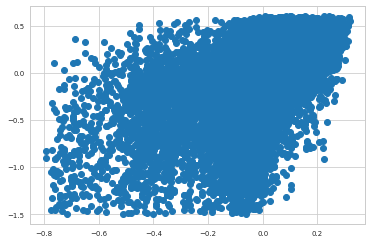

In [22]:
plt.plot(predictions_train,y_train,'o')

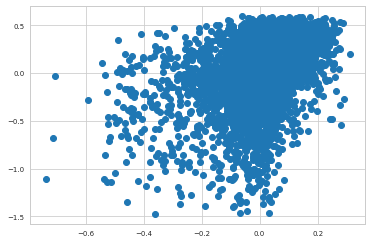

In [23]:
plt.plot(predictions_test,y_test,'o')

In [24]:
df = noun_sentence_df_final_joined_df_selected_columns_use_min.copy()


In [25]:
predictions_test_value = df['avmValue'].values[train_samples:]/(1-predictions_test)
predictions_train_value = df['avmValue'].values[:train_samples]/(1-predictions_train)
#predictions_train_value = df['avmValue'].values/(1-Predictors)

In [26]:
print(df.head(1)['avmValue'])
print(df.head(1)['Transprice'])
print(df.head(1)['avmerror'])
print(df.head(1)['avmValue']+df.head(1)['avmerror']*df.head(1)['avmValue'])
print((df.head(1)['Transprice']-df.head(1)['avmValue'])/df.head(1)['Transprice'])

0    82477.56
Name: avmValue, dtype: float64
0    53100.0
Name: Transprice, dtype: float64
0   -0.55325
Name: avmerror, dtype: float64
0    36846.873229
dtype: float64
0   -0.55325
dtype: float64


In [27]:
df.columns

Index(['index', 'listingid', 'AVM_Error_List', 'Listing_Error_List',
       'Transdate', 'Transprice', 'total_value', 'cj_living_area',
       'effective_year_built', 'story', 'ListingPrice', 'avmValue', 'avmerror',
       'bedrooms', 'AVM_Error_Indicators_0', 'AVM_Error_Indicators_1',
       'AVM_Error_Indicators_2', 'AVM_Error_Indicators_3',
       'AVM_Error_Indicators_4', 'AVM_Error_Indicators_5',
       'AVM_Error_Indicators_6', 'AVM_Error_Indicators_7',
       'AVM_Error_Indicators_8', 'AVM_Error_Indicators_9',
       'AVM_Error_Indicators_10', 'AVM_Error_Indicators_11',
       'AVM_Error_Indicators_scale', 'Listing_Error_Indicators_0',
       'Listing_Error_Indicators_1', 'Listing_Error_Indicators_2',
       'Listing_Error_Indicators_3', 'Listing_Error_Indicators_4',
       'Listing_Error_Indicators_5', 'Listing_Error_Indicators_6',
       'Listing_Error_Indicators_7', 'Listing_Error_Indicators_8',
       'Listing_Error_Indicators_9', 'Listing_Error_Indicators_10',
       'Listi

In [28]:
print(np.mean(np.abs(df['Transprice'].values[:train_samples]-predictions_train_value)/\
              (df['Transprice'].values[:train_samples])))
print(np.mean(np.abs(df['Transprice'].values[:train_samples]- df['avmValue'].values[:train_samples])/\
              (df['Transprice'].values[:train_samples])))


0.12719710071533172
0.14245259226214338


In [29]:
print(np.mean(np.abs(df['Transprice'].values[train_samples:]-predictions_test_value)/\
              (df['Transprice'].values[train_samples:])))
print(np.mean(np.abs(df['Transprice'].values[train_samples:]- df['avmValue'].values[train_samples:])/\
              (df['Transprice'].values[train_samples:])))


0.13154759421170822
0.13958540515512766


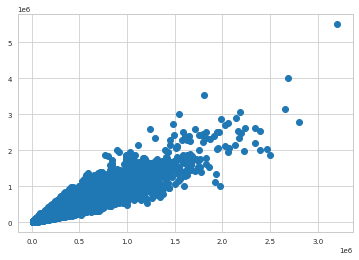

In [30]:
plt.plot(predictions_train_value,df['Transprice'].values[:train_samples],'o')

In [31]:
df.columns

Index(['index', 'listingid', 'AVM_Error_List', 'Listing_Error_List',
       'Transdate', 'Transprice', 'total_value', 'cj_living_area',
       'effective_year_built', 'story', 'ListingPrice', 'avmValue', 'avmerror',
       'bedrooms', 'AVM_Error_Indicators_0', 'AVM_Error_Indicators_1',
       'AVM_Error_Indicators_2', 'AVM_Error_Indicators_3',
       'AVM_Error_Indicators_4', 'AVM_Error_Indicators_5',
       'AVM_Error_Indicators_6', 'AVM_Error_Indicators_7',
       'AVM_Error_Indicators_8', 'AVM_Error_Indicators_9',
       'AVM_Error_Indicators_10', 'AVM_Error_Indicators_11',
       'AVM_Error_Indicators_scale', 'Listing_Error_Indicators_0',
       'Listing_Error_Indicators_1', 'Listing_Error_Indicators_2',
       'Listing_Error_Indicators_3', 'Listing_Error_Indicators_4',
       'Listing_Error_Indicators_5', 'Listing_Error_Indicators_6',
       'Listing_Error_Indicators_7', 'Listing_Error_Indicators_8',
       'Listing_Error_Indicators_9', 'Listing_Error_Indicators_10',
       'Listi

In [34]:
import joblib
filename = 'RF_newmodel_'+state+'_01.sav'
joblib.dump(model,filename)

['RF_newmodel_AL_01.sav']

In [32]:
from shap import TreeExplainer
from shap import summary_plot

In [37]:
explainer = TreeExplainer(model)

In [38]:
shap_values = np.array(explainer.shap_values(X_train))

In [39]:
print(shap_values.shape)

(200000, 19)


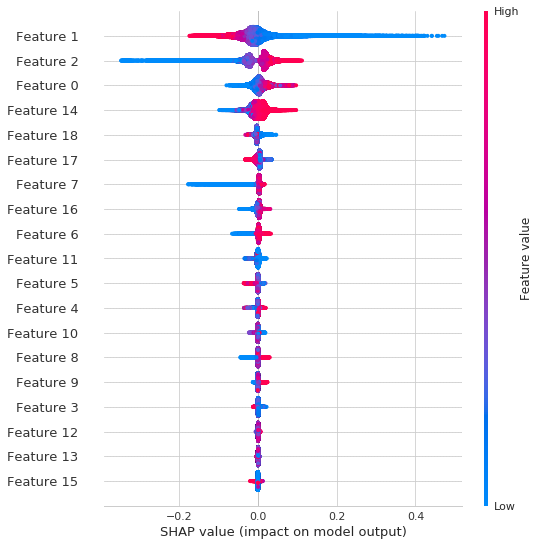

In [42]:
summary_plot(shap_values, X_train)

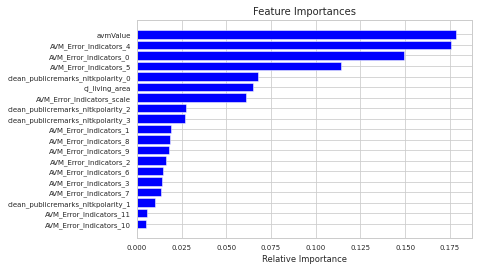

In [33]:
importances = model.feature_importances_
indices = np.argsort(importances)
features = predictor_columns
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()